
# Project: Investigate a Dataset (Global Oil Production, Oil Consumption and  Oil Price)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I will investigate three datasets related to:
* global oil production
* global oil consumption 
* global oil prices

From the data I will analyze who are major global producers and consumers of oil based on average production and consumption.
See relationship of peaks and troughs - trends of global oil prices with global political events via extra google information. 

In [107]:
import numpy as np
import pandas as pd
import os
from datetime import datetime # operations to parse dates
from ggplot import *
import matplotlib.pyplot as plt

%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling


### Loading data - global oil prices, oil production and oil consumption


In [108]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
os.chdir(r'D:\courses\Nanodegree\term1\intro_data_anal\dataset') 
os.getcwd()
###  #  Global price of Brent Crude (POILBREUSDA), U.S. Dollars per Barrell,Not Seasonally Adjusted

oil_prices = pd.read_csv("brent_global.csv")
		
### Definition and explanations		
### Indicator name	Crude oil production, total (toe)	
### Definition of indicator	Total amount of crude oil production during the given year, counted in tonnes (toe). Includes crude oil, shale oil, oil sands and NGLs (the liquid content of natural gas where this is recovered separately).	
### Unit of measurement	toe	
### Data source	Source organization(s)	BP	Link to source organization	www.bp.com	Complete reference	BP Statistical Review of World Energy 2012	
### Link to complete reference	http://www.bp.com/statisticalreview	
### Time of uploading	25.2.2013.

oil_production = pd.read_excel("oil_production.xlsx")

### Oil Consumption total (tonnes per year)	
### Definition and explanations		
### Indicator name	Oil Consumption total (tonnes per year)	
### Definition of indicator	Oil Consumption total (tonnes per year)	
### Unit of measurement		Data source		Source organization(s)	BP	Link to source organization	http://www.bp.com/	
### Complete reference		Link to complete reference	http://www.bp.com/statisticalreview	
### Time of uploading	10/5 2012

oil_consumption = pd.read_excel("oil_consumption.xlsx",na_values ="-")


### Inspecting loaded datasets

### Oil prices dataframe investigation

In [109]:
oil_prices.head(2) ### dataframe contains two columns, date and oil price in US dollars

,DATE,POILBREUSDA
0,1980-01-01,37.891667
1,1981-01-01,36.675833


In [110]:
oil_prices.shape ### oil prices table contains 2 columns and 37 rows

(37, 2)

In [111]:
oil_prices.describe() ### range of oil prices is from 12.7 to 111.9 US dollars with a mean of 41.8.

,POILBREUSDA
count,37.000000
mean,41.807832
std,30.711297
min,12.719167
25%,19.115833
50%,28.743333
75%,54.434167
max,111.959592


### Oil production dataframe investigation

In [112]:
oil_production.head(5) ### oil production dataframe contains 48 columns where 1st column is wrongly named and it contains
                       ### Countries and the rest of the columns represent yearly oil productions

,"Crude oil production, total (toe)",1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,26481000.0,33872000.0,39076000.0,42904000.0,44784000.0,48208000.0,37099000.0,50098000.0,50888000.0,...,70894000.0,79005000.0,83551000.0,86437670.0,86202000.0,86482000.0,8.562018e+07,7.784691e+07,7.550114e+07,7.431146e+07


In [113]:
oil_production.describe() ### summary statistics show total oil productions stats per year for all of the countries.
                        ### it needs to be visualised to comprehend the data

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,3.600000e+01,3.700000e+01,3.700000e+01,3.900000e+01,3.900000e+01,3.900000e+01,4.000000e+01,4.200000e+01,4.200000e+01,4.200000e+01,...,4.700000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01
mean,3.594683e+07,3.797267e+07,4.064622e+07,4.224891e+07,4.560825e+07,5.049943e+07,5.210008e+07,5.250194e+07,5.731077e+07,5.679905e+07,...,7.528571e+07,7.614095e+07,7.974359e+07,8.053478e+07,8.080068e+07,8.075730e+07,8.152256e+07,7.956299e+07,8.118988e+07,8.215746e+07
std,7.897325e+07,8.259329e+07,8.808066e+07,9.054929e+07,9.323808e+07,9.857191e+07,9.959081e+07,1.018014e+08,1.079713e+08,1.084993e+08,...,9.652898e+07,1.040518e+08,1.084341e+08,1.102814e+08,1.100228e+08,1.089150e+08,1.102022e+08,1.069100e+08,1.091443e+08,1.160546e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.518000e+06,1.237410e+06,3.376000e+06,3.439000e+06,3.306000e+06,4.608000e+06,4.209776e+06,3.950356e+06,3.649308e+06,3.585000e+06
25%,5.984453e+05,6.310000e+05,1.723000e+06,1.337784e+06,2.341805e+06,4.007561e+06,3.303202e+06,3.597939e+06,3.801054e+06,3.924501e+06,...,1.350870e+07,1.278998e+07,1.408790e+07,1.442622e+07,1.581097e+07,1.450851e+07,1.383972e+07,1.409762e+07,1.375662e+07,1.241370e+07
50%,8.663003e+06,7.562912e+06,8.850564e+06,8.577000e+06,1.123391e+07,1.175993e+07,1.288440e+07,9.819683e+06,1.057493e+07,9.630694e+06,...,3.524200e+07,3.607350e+07,3.592160e+07,3.425400e+07,3.469700e+07,3.472435e+07,3.529371e+07,3.563111e+07,3.992964e+07,3.778876e+07
75%,2.502170e+07,2.392946e+07,2.574689e+07,2.725296e+07,3.070951e+07,4.566071e+07,4.716413e+07,5.356662e+07,6.406329e+07,6.827422e+07,...,1.031290e+08,1.071330e+08,1.052034e+08,9.858091e+07,1.035435e+08,1.074447e+08,1.075253e+08,1.067294e+08,1.130897e+08,1.152757e+08
max,4.276871e+08,4.545269e+08,4.842091e+08,5.028932e+08,5.113680e+08,5.334974e+08,5.258989e+08,5.278931e+08,5.146546e+08,4.913961e+08,...,4.241200e+08,4.838018e+08,5.043054e+08,5.248709e+08,5.124392e+08,4.923720e+08,5.134809e+08,4.942470e+08,5.051300e+08,5.258003e+08


### Oil consumption dataframe investigation

In [114]:
oil_consumption.head(2) ### oil consumption dataframe contains 48 columns where 1st column is wrongly named and it contains
                       ### Countries and the rest of the columns represent yearly oil productions

,Oil Consumption total (tonnes per year),1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Algeria,1289000.0,1693000.0,1578000.0,1682000.0,1775000.0,2032000.0,2288000.0,2514000.0,2739000.0,...,9744000,10134000,10598000,11039396,11519500,12904556,14012890,14900000.0,14900000.0,NaN
1,Argentina,21952000.0,22678000.0,23224000.0,23733000.0,24671000.0,21942000.0,23491000.0,23162000.0,23189000.0,...,17107000,17558000,18401000,19676875,20555955,23192795,24219411,23700000.0,25700000.0,NaN


In [115]:
oil_consumption.describe()  ### summary statistics show total oil consumption stats per year for all of the countries.
                        ### it needs to be visualised to comprehend the data

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,5.300000e+01,5.300000e+01,5.400000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.600000e+01,5.600000e+01,5.600000e+01,...,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.300000e+01,6.300000e+01,0.0
mean,2.420423e+07,2.602236e+07,2.725363e+07,2.912764e+07,3.168165e+07,3.435551e+07,3.625852e+07,3.826923e+07,4.132684e+07,4.007663e+07,...,5.215546e+07,5.310609e+07,5.513841e+07,5.579240e+07,5.623858e+07,5.690471e+07,5.664068e+07,5.703968e+07,5.874921e+07,NaN
std,7.638894e+07,8.033986e+07,8.292132e+07,8.804396e+07,9.324072e+07,9.791154e+07,1.018292e+08,1.087909e+08,1.155016e+08,1.103601e+08,...,1.186607e+08,1.211732e+08,1.265412e+08,1.271270e+08,1.268052e+08,1.270615e+08,1.212227e+08,1.166884e+08,1.207775e+08,NaN
min,4.800000e+05,5.390000e+05,7.100000e+04,5.700000e+04,9.500000e+04,9.300000e+04,8.900000e+04,1.060000e+05,1.380000e+05,1.880000e+05,...,9.110000e+05,8.920000e+05,9.550000e+05,1.014000e+06,9.940000e+05,1.039692e+06,9.480000e+05,2.600000e+06,2.700000e+06,NaN
25%,3.376000e+06,3.878000e+06,3.888500e+06,4.261500e+06,4.371000e+06,4.677000e+06,5.194500e+06,5.278000e+06,5.433250e+06,5.563500e+06,...,9.171250e+06,8.775000e+06,9.041250e+06,9.627825e+06,9.696500e+06,9.662750e+06,9.634566e+06,9.800000e+06,9.800000e+06,NaN
50%,5.534000e+06,5.894000e+06,6.074500e+06,6.690000e+06,7.410000e+06,8.380000e+06,9.388000e+06,9.946500e+06,1.107600e+07,1.079600e+07,...,1.603550e+07,1.586300e+07,1.595328e+07,1.561940e+07,1.654009e+07,1.765604e+07,1.803223e+07,2.020000e+07,1.850000e+07,NaN
75%,1.422900e+07,1.621800e+07,1.651500e+07,1.868850e+07,2.031600e+07,2.118550e+07,2.210000e+07,2.316800e+07,2.381325e+07,2.532925e+07,...,5.739283e+07,5.825841e+07,6.197560e+07,6.296977e+07,6.090851e+07,6.197319e+07,6.228975e+07,6.680000e+07,6.765000e+07,NaN
max,5.489330e+08,5.756640e+08,5.957610e+08,6.354520e+08,6.677910e+08,6.945900e+08,7.192690e+08,7.758410e+08,8.180320e+08,7.825540e+08,...,8.973580e+08,9.122620e+08,9.487532e+08,9.513740e+08,9.438025e+08,9.423027e+08,8.845299e+08,8.332000e+08,8.500000e+08,NaN


### Data Cleaning (renaming columns, extracting, filtering, melting, transposing)

### Oil prices dataset - clean up
Renaming columns names to something more appropriate, extracting only years from date_time and rounding prices to zero decimals.
All in all it is pretty clean dataset.

In [116]:
oil_prices.head(2) ### dataset precleaning

,DATE,POILBREUSDA
0,1980-01-01,37.891667
1,1981-01-01,36.675833


In [117]:
oil_prices.rename(columns={'DATE': 'YEAR', 'POILBREUSDA': 'USD_BRENT'}, inplace=True)

In [118]:
oil_prices['YEAR'] = pd.DatetimeIndex(oil_prices['YEAR']).year
oil_prices = oil_prices.round({'USD_BRENT': 0})


In [119]:
### filter oil price from 1980-2011 so it fits oil production time span
oil_prices = oil_prices.query('YEAR >= 1980 & YEAR <=2011')

In [120]:
oil_prices.head(3) ### dataset post clean-up

,YEAR,USD_BRENT
0,1980,38.0
1,1981,37.0
2,1982,33.0


### Oil Production dataset - clean up
Transposing the dataframe, renaming relevant names to something more appropriate, dropping columns which are completely empty.

In [121]:
oil_production.head(2) ### data set pre clean-up and transposition

,"Crude oil production, total (toe)",1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
oil_production.rename(columns={r'Crude oil production, total (toe)': 'Countries'}, inplace=True)

In [123]:
oil_production = oil_production.set_index('Countries').transpose()

In [124]:
oil_production.reset_index(inplace=True)

In [125]:
oil_production.rename(columns={'index': 'Year'}, inplace=True)

In [126]:
oil_production.shape #### BEFORE dropping columns with all NaNs

(47, 276)

In [127]:
oil_production = oil_production.dropna(axis=1, how='all')
oil_production.shape #### AFTER dropping columns with all NaNs

(47, 49)

In [128]:
oil_production.head(2) ### dataset after the clean-up and transposition  together with dropping all the columns with all NaN values

Countries,Year,Algeria,Angola,Argentina,Australia,Azerbaijan,Brazil,Brunei,Canada,Chad,...,Trinidad and Tobago,Tunisia,Turkmenistan,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,Vietnam,Yemen
0,1965,26481000.0,655000.0,1.376476e+07,346205.96206,0.0,5.033297e+06,3.964974e+06,4.387418e+07,NaN,...,6.671460e+06,NaN,0.0,1.365663e+07,84000.0,4.276871e+08,0.0,1.841140e+08,NaN,NaN
1,1966,33872000.0,631000.0,1.464397e+07,445121.95122,0.0,6.147396e+06,4.760614e+06,4.821215e+07,NaN,...,7.562912e+06,771000.0,0.0,1.743399e+07,78000.0,4.545269e+08,0.0,1.787859e+08,NaN,NaN


### Oil consumption dataset - clean-up
Transposing the dataframe, renaming relevant names to something more appropriate, dropping columns which are completely empty.

In [129]:
oil_consumption.head(2) ### dataset pre clean-up and transposition

,Oil Consumption total (tonnes per year),1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Algeria,1289000.0,1693000.0,1578000.0,1682000.0,1775000.0,2032000.0,2288000.0,2514000.0,2739000.0,...,9744000,10134000,10598000,11039396,11519500,12904556,14012890,14900000.0,14900000.0,NaN
1,Argentina,21952000.0,22678000.0,23224000.0,23733000.0,24671000.0,21942000.0,23491000.0,23162000.0,23189000.0,...,17107000,17558000,18401000,19676875,20555955,23192795,24219411,23700000.0,25700000.0,NaN


In [130]:
oil_consumption.rename(columns={r'Oil Consumption total (tonnes per year)': 'Countries'}, inplace=True)

In [131]:
oil_consumption = oil_consumption.set_index('Countries').transpose()

In [132]:
oil_consumption.reset_index(inplace=True)

In [133]:
oil_consumption.rename(columns={'index': 'Year'}, inplace=True)

In [134]:
oil_consumption = oil_consumption.dropna(axis=1, how='all')

In [135]:
oil_consumption.head(2) ### dataset post clean-up and transposition together with dropping all the columns with all NaN values

Countries,Year,Algeria,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Brazil,Bulgaria,...,Taiwan,Thailand,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela
0,1965,1289000.0,21952000.0,16902000.0,5534000.0,NaN,NaN,NaN,14878000.0,3702000.0,...,2164000.0,2300000.0,5021000.0,NaN,NaN,NaN,74223000.0,548933000.0,NaN,9340000.0
1,1966,1693000.0,22678000.0,18120000.0,6068000.0,NaN,NaN,NaN,16218000.0,4226000.0,...,2564000.0,2719000.0,4548000.0,NaN,NaN,NaN,79472000.0,575664000.0,NaN,9448000.0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Top Global Oil Producers 1965-2011)

Which oil producers globally have on average more than 150 million of tons of crude oil in a time span of 1965-2011?


In [136]:
### oil_production dataset was reshaped so it contains 3 columns, year, country and oil production as a valuoe column so it can be visualized in a line chart
countries = oil_production.columns[1:]
melted_oil_production = pd.melt(oil_production, id_vars=['Year'], value_vars=countries)

In [137]:
len(countries) ### number of countries in the dataset is equal to 48 

48

In the following chart you will see an overview of 48 oil producing countries per year over a range between 1965-2011

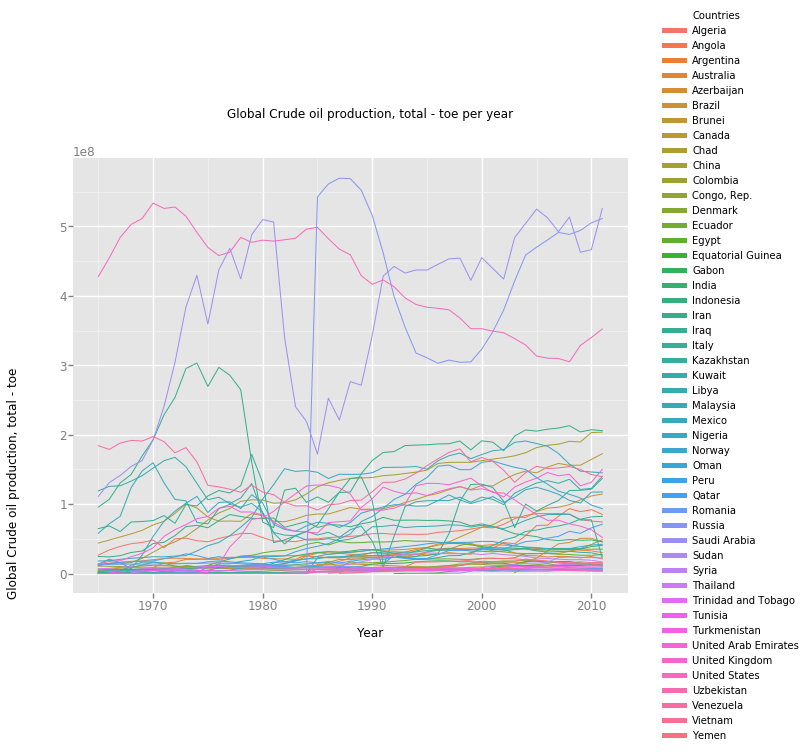

<ggplot: (-9223371856250262461)>


In [138]:

print (ggplot(melted_oil_production, aes(x='Year',y='value',color="Countries")) + \
    geom_line() + \
       xlab("Year") + \
      ylab("Global Crude oil production, total - toe") + \
      ggtitle("Global Crude oil production, total - toe per year"))

** Since the chart above contains a lot of countries which have a relatively lower oil production I will find out who are oil producers who have more than 150 million of toe crude oil production on average **

In [139]:
mean_production_percountry = melted_oil_production[["Countries","value"]].groupby("Countries").mean()/1000000

In [140]:
mean_production_percountry.rename(columns={'value': 'Crude_Oil_Prod_mil_tonnes'}, inplace=True)

In [141]:
mean_production_percountry.query('Crude_Oil_Prod_mil_tonnes >=150').reset_index()

,Countries,Crude_Oil_Prod_mil_tonnes
0,Iran,180.796663
1,Russia,249.903527
2,Saudi Arabia,373.154070
3,United States,424.677253


** Iran, Russia, Saudi Arabia and United states have more than 150 million of toe crude oil production on average **

In [142]:
over150 = melted_oil_production.query('Countries =="Iran" | Countries =="Russia" | Countries =="Saudi Arabia" | Countries =="United States"')

In [143]:
over150["value"] = over150["value"]/1000000

C:\Users\kbaka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In the chart bellow one can vizualize how does the oil production vary between 1965 and 2011 for 4 on average largest oil producers. The varying nature of the individual country production lines has a complex geopolitical nature and will not be scrutinised or explained. One can google certain parts of the trends on internet if curious.

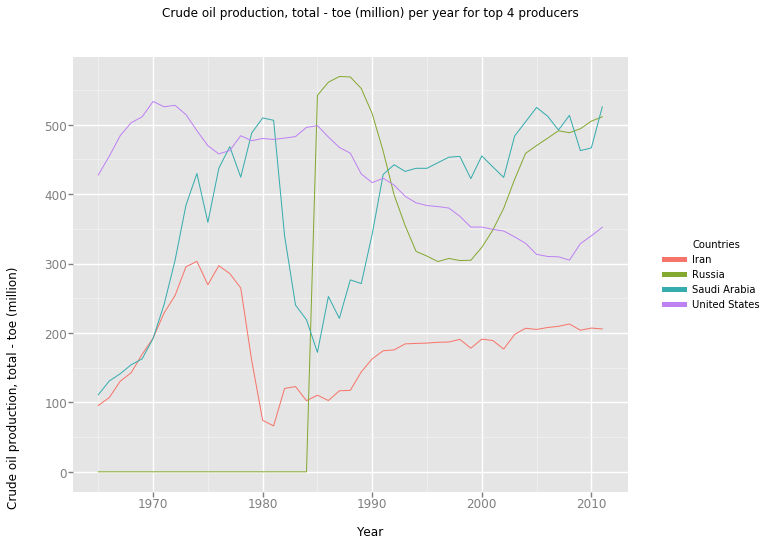

<ggplot: (180605260436)>


In [144]:
print (ggplot(over150, aes(x='Year',y='value',color="Countries")) + \
    geom_line()+ \
    xlab("Year") + \
      ylab("Crude oil production, total - toe (million)") + \
      ggtitle("Crude oil production, total - toe (million) per year for top 4 producers"))


### Bonus question. Which country has produced the biggest percentage of oil between 1965 and 2011?

In [145]:
total_oil_production = melted_oil_production.groupby("Countries")["value"].sum().nlargest(10).reset_index() ### top 10 largest oil producers

In [146]:
total_oil_production_list = total_oil_production["Countries"].tolist()

Bellow on the pie-chart you will see top 10 oil producers between 1965 and 2011 where a piece of pie with the highest percentage of oil produced is sliced out. All slices together represent percentage of production between top 10 oil producers.

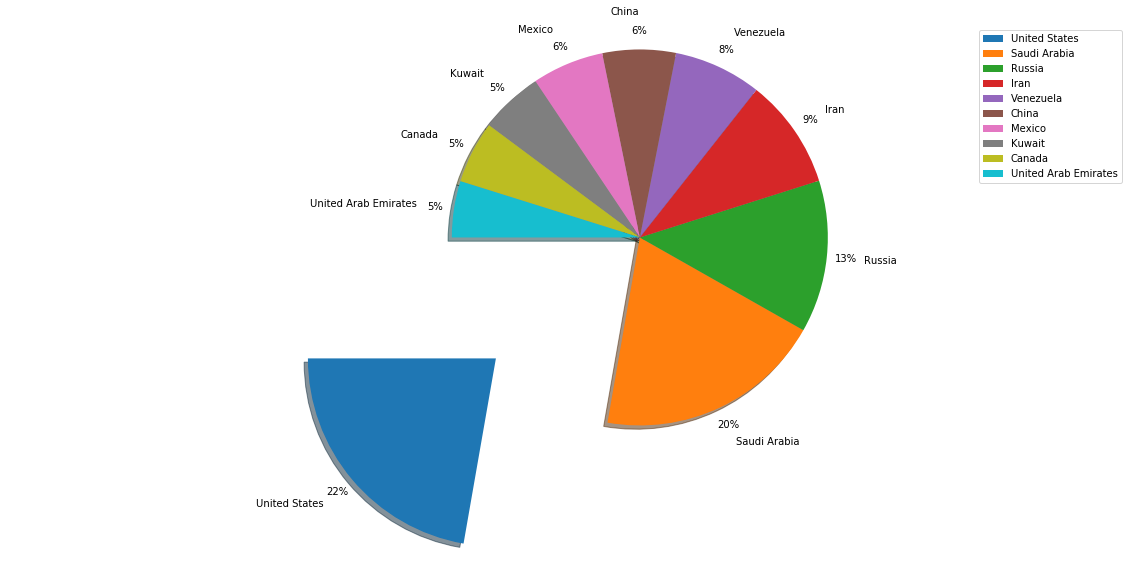

In [147]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = total_oil_production_list
sizes = total_oil_production["value"]
explode =  total_oil_production["Countries"]== "United States" # only "explode" the 2nd slice (i.e. 'United States')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=180,pctdistance=1.1, labeldistance=1.2)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig = plt.gcf()
fig.set_size_inches(20,10) 
plt.legend(labels, loc="best")
plt.show()

### Research Question 2 (Top Global Oil Consumers 1965-2011)

Which oil consumers globally have on average more than 150 million of tons of crude oil in a time span of 1965-2011? 

In [148]:
countries_consumption = oil_consumption.columns[1:]

In [149]:
oil_consumption_melted = pd.melt(oil_consumption, id_vars=['Year'], value_vars = countries_consumption)

In [150]:
len(countries_consumption) ### number of countries in the dataset is 64

64

In the following chart you will see an overview of 64 oil producing countries per year over a range between 1965-2011

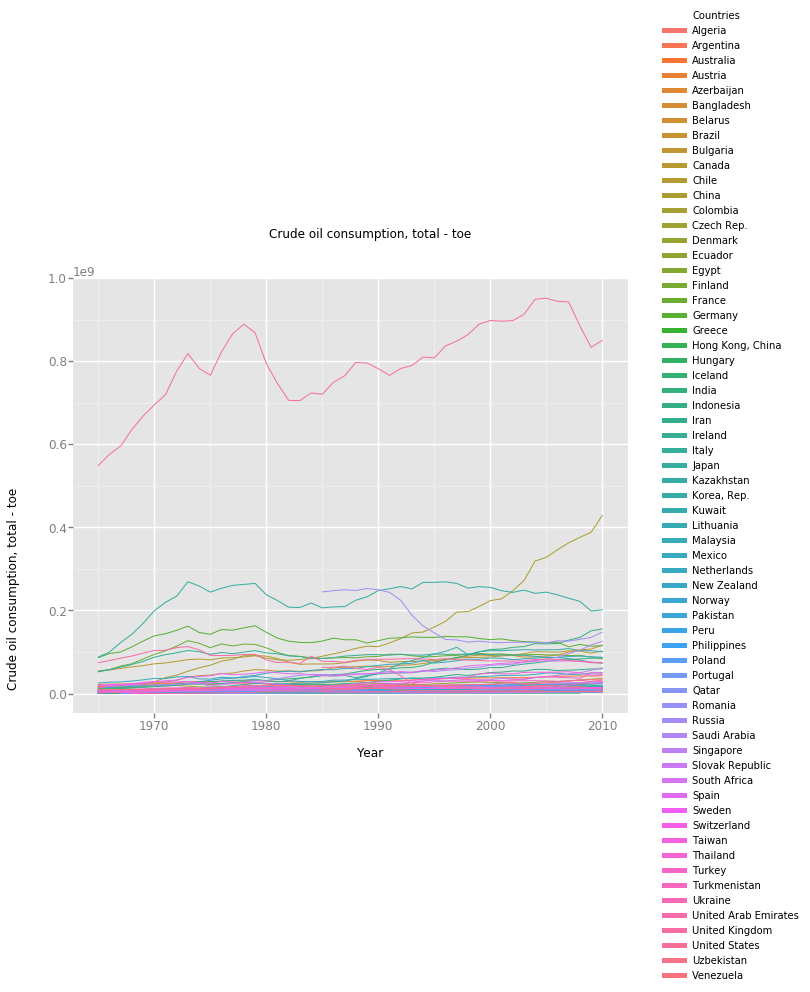

<ggplot: (-9223371856250383921)>


In [151]:
print (ggplot(oil_consumption_melted, aes(x='Year',y='value',color="Countries")) + \
    geom_line() + \
    xlab("Year") + \
      ylab("Crude oil consumption, total - toe") + \
      ggtitle("Crude oil consumption, total - toe"))

** Since the chart above contains a lot of countries which have a relatively lower oil consumption I will find out who are oil consumers who have more than 150 million of toe crude oil production on average** 

In [152]:
mean_consumption_percountry = oil_consumption_melted[["Countries","value"]].groupby("Countries").mean()/1000000

In [153]:
mean_consumption_percountry.rename(columns={'value': 'Crude_Oil_cons_mil_tonnes'}, inplace=True)

In [154]:
mean_consumption_percountry.query('Crude_Oil_cons_mil_tonnes >=150').reset_index()

,Countries,Crude_Oil_cons_mil_tonnes
0,Japan,226.613432
1,Russia,168.120652
2,United States,796.870159


** Japan, Russia, and United states have more than 150 million of toe crude oil consumption on average **

In [155]:
over150_consumption = oil_consumption_melted.query('Countries =="Japan" | Countries =="Russia" | Countries =="United States"')

In [156]:
over150_consumption["value"] = over150_consumption["value"]/1000000

C:\Users\kbaka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In the chart bellow one can vizualize how does the oil consumption vary between 1965 and 2011 for 3 on average largest oil consumers. The varying nature of the individual country consumption lines has a complex geopolitical nature and will not be scrutinised or explained. One can google certain parts of the trends on internet if curious.

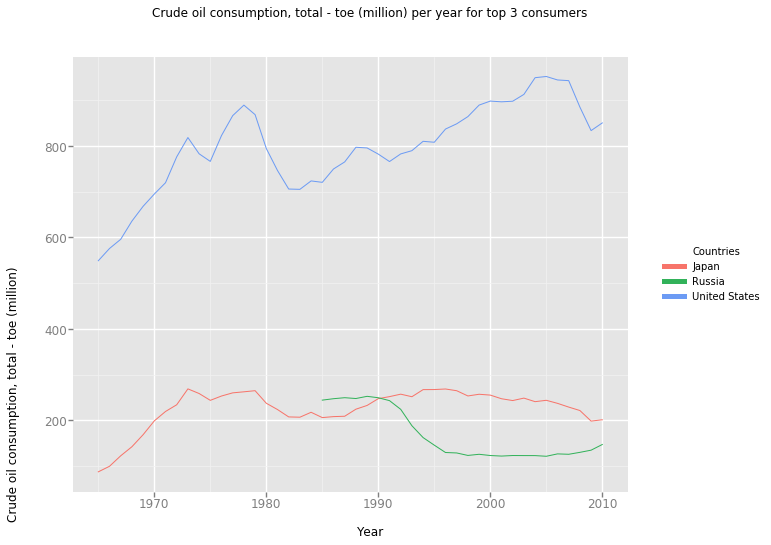

<ggplot: (-9223371856249574645)>


In [157]:
print (ggplot(over150_consumption, aes(x='Year',y='value',color="Countries")) + \
    geom_line() + \
    xlab("Year") + \
      ylab("Crude oil consumption, total - toe (million)") + \
      ggtitle("Crude oil consumption, total - toe (million) per year for top 3 consumers"))


### Bonus question. Which country has consumed the biggest percentage of oil between 1965 and 2011?

In [158]:
total_oil_consumption = oil_consumption_melted.groupby("Countries")["value"].sum().nlargest(10).reset_index()

In [159]:
total_oil_consumption_list = total_oil_consumption["Countries"].tolist()

Bellow on the pie-chart you will see top 10 oil consumers between 1965 and 2011 where a piece of pie with the highest percentage of oil consumed is sliced out. All slices together represent percentage of consumption between top 10 oil producers.

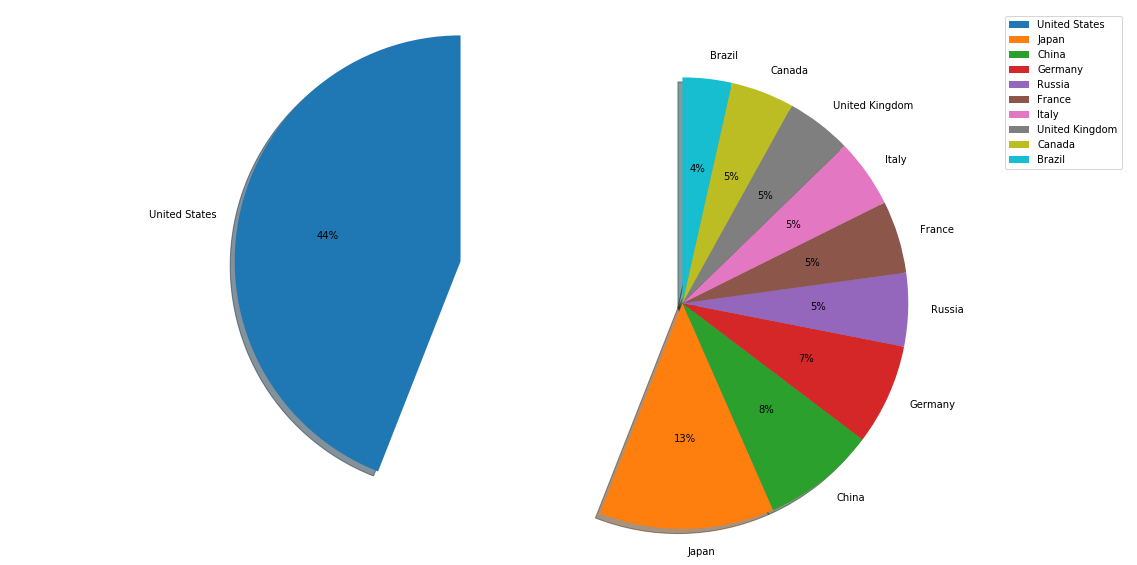

In [160]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = total_oil_consumption_list
sizes = total_oil_consumption["value"]
explode =  total_oil_consumption["Countries"]== "United States" # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig = plt.gcf()
fig.set_size_inches(20,10) 
plt.legend(labels, loc="best")

plt.show()


### Research Question 3  (Global Oil Production and Global Oil Prices)

What is the total (summarised for all oil producers) global oil production of crude oil per year compared with the global oil price per year?
Are there any trends and correlation between oil production and oil price, and if so, in which years, google about the political and economic reasons for it?

Summarize oil production per year between 1980 and 2011

In [161]:
global_production=  melted_oil_production.query('Year >= 1980 & Year <=2011')
global_production = global_production.groupby("Year").sum()
global_production.reset_index(inplace=True)

In [162]:
### filter oil price from 1980-2011 so it fits oil production time span
oil_prices = oil_prices.query('YEAR >= 1980 & YEAR <=2011')

In [163]:
OIL_PRICES_CHART = ggplot(oil_prices, aes(x='YEAR',y='USD_BRENT')) + \
    geom_line()  + \
       xlab("Year") + \
      ylab("Brent Oil Price - USD") + \
      ggtitle("Brent Oil Price (USD) per year")

GLOBAL_PRODUCTION_CHART = ggplot(global_production, aes(x='Year',y='value')) + \
    geom_line(color="red")  + \
       xlab("Year") + \
      ylab("Global Crude oil production, total - toe (billion)") + \
      ggtitle("Global Crude oil production, total - toe (billion) per year")
 

1st graph bellow shows how oil prices in US dollars changed from 1980-2011 and 2nd graph is showing global crude oil production in range of 1980-2011. Trends, local maximum and minimums will be addressed in conclusion section.

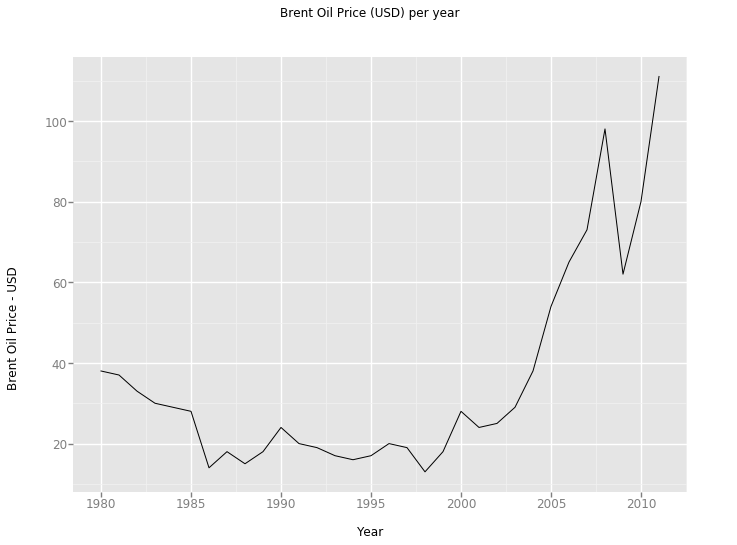

<ggplot: (-9223371856250266210)>


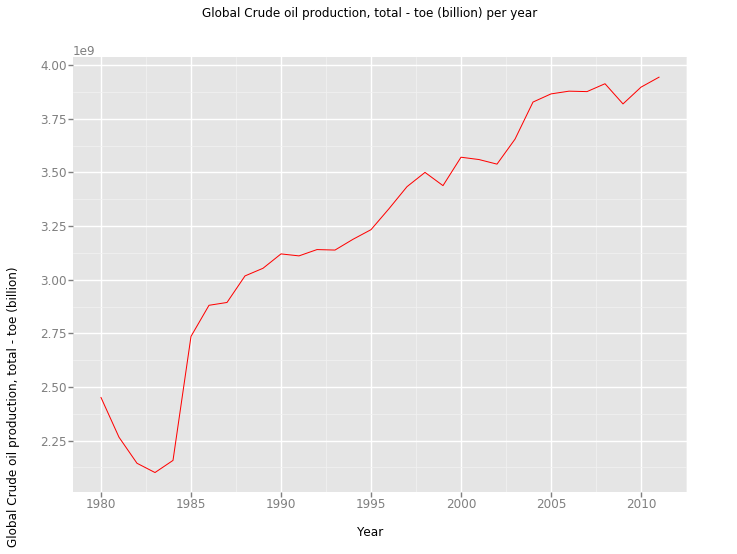

<ggplot: (-9223371856250266182)>


In [164]:
print(OIL_PRICES_CHART)
print(GLOBAL_PRODUCTION_CHART)

Summary table below shows that in a range from year 1980 and 2011 total crude Oil production had a range from 2.1 billion to 3.9 billions of tons of toe, with a mean value of 3.2.

In [165]:
global_production.describe()

,Year,value
count,32.000000,3.200000e+01
mean,1995.500000,3.239954e+09
std,9.380832,5.614170e+08
min,1980.000000,2.101327e+09
25%,1987.750000,2.986600e+09
50%,1995.500000,3.281892e+09
75%,2003.250000,3.695830e+09
max,2011.000000,3.943558e+09


Summary table below shows that in a range from year 1980 and 2011 total crude Oil price had a range from 13 US dollars to 111 US dollars with a mean value of 35.

In [166]:
oil_prices.describe()

,YEAR,USD_BRENT
count,32.000000,32.000000
mean,1995.500000,35.312500
std,9.380832,25.353548
min,1980.000000,13.000000
25%,1987.750000,18.000000
50%,1995.500000,26.500000
75%,2003.250000,38.000000
max,2011.000000,111.000000


<a id='conclusions'></a>
## Conclusions


In the following section I will summarize main conclusions as a consequence of exploratory data analyses and answer 3 research questions separately.

### Research Question 1 (Top Average Global Oil Producers 1965-2011)

In [167]:
top_avg_producers = mean_production_percountry.query('Crude_Oil_Prod_mil_tonnes >=150').reset_index()
top_avg_producers

,Countries,Crude_Oil_Prod_mil_tonnes
0,Iran,180.796663
1,Russia,249.903527
2,Saudi Arabia,373.154070
3,United States,424.677253


** United States, Saudi Arabia, Russia and Iran, in descending order, have more than 150 million of toe crude oil production on average based on the statistics and visualisations. **

### Research Question 2 (Top Average Global Oil Producers 1965-2011)

In [168]:
top_avg_consumers = mean_consumption_percountry.query('Crude_Oil_cons_mil_tonnes >=150').reset_index()
top_avg_consumers

,Countries,Crude_Oil_cons_mil_tonnes
0,Japan,226.613432
1,Russia,168.120652
2,United States,796.870159


** United States, Japan, and Russia, in descending order, have more than 150 million of toe crude oil consumption on average based on the statistics and visualisations. **

### Bonus question from Research question one and two sections

Since the result of the bonus questions from research question one and two is the same I will note down a single conclusion, and that is that United States has produced and consumed higest percantage of global crude oil between 1965 and 2011.

### Research Question 3 ((Total Global Oil Production Per Year and Global Oil Prices Per Year 1980-2011)

On the "Brent Oil Price (USD) per year" few key peaks and troughs are jumping out. When googling about global geopolitical causes of changes in global oil prices I have managed to attach them to few key events in geopolitics which I will paste from www's sources. These are not my original geopolitical conclusions:) My personal task was to connect anomalies and trends to global events that are already quite well known http://www.wtrg.com/prices.htm

* **1982-1985** 

OPEC (Organization of the Petroleum Exporting Countries)) was faced with lower demand and higher supply from outside the organization. From 1982 to 1985, OPEC attempted to set production quotas low enough to stabilize prices. These attempts resulted in repeated failure, as various members of OPEC produced beyond their quotas. During most of this period Saudi Arabia acted as the swing producer cutting its production in an attempt to stem the free fall in prices. In August 1985, the Saudis tired of this role.  They linked their oil price to the spot market for crude and by early 1986 increased production from two million barrels per day to five million.  Crude oil prices plummeted falling below $10 per barrel by mid-1986. Despite the fall in prices Saudi revenue remained about the same with higher volumes compensating for lower prices.

* **1990** 

The price of crude oil spiked in 1990 with the lower production, uncertainty associated with the Iraqi invasion of Kuwait and the ensuing Gulf War. The world and particularly the Middle East had a much harsher view of Saddam Hussein invading Arab Kuwait than they did Persian Iran. The proximity to the world's largest oil producer helped to shape the reaction. Following what became known as the **Gulf War** to liberate Kuwait, crude oil prices entered a period of steady decline. 

* **1994**

In 1994, the inflation adjusted oil price reached the lowest level since 1973.

* **1998** 

The price increases came to a rapid end in 1997 and 1998 when the impact of the economic crisis in Asia was either ignored or underestimated by OPEC.  In December 1997, OPEC increased its quota by 2.5 million barrels per day (10 percent) to 27.5 million barrels per day effective January 1, 1998. The rapid growth in Asian economies came to a halt. In 1998, Asian Pacific oil consumption declined for the first time since 1982. The combination of lower consumption and higher OPEC production sent prices into a downward spiral.   In response, OPEC cut quotas by 1.25 million barrels per day in April and another 1.335 million in July. The price continued down through December 1998.

* **2000** 

With minimal Y2K problems and growing U.S. and world economies, the price continued to rise throughout 2000 to a post 1981 high. In 2000 between April and October, three successive OPEC quota increases totaling 3.2 million barrels per day were not able to stem the price increase. Prices finally started down following another quota increase of 500,000 effective November 1, 2000.

* **2008**

In 2008, after the beginning of the longest U.S. recession since the Great Depression the oil price continued to soar. Spare capacity dipped below a million barrels per day and speculation in the crude oil futures market was exceptionally strong. Trading on NYMEX closed at a record on July 3, 2008. In the face of recession and falling petroleum demand the price fell throughout the remainder of the year.

* **2009**

Following an OPEC cut of 4.2 million b/d in January 2009 prices rose steadily in the supported by rising demand in Asia. 
